In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBRx import sosf,acf,ps,sosfnorm,sosfw,sosfwx

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=125

In [3]:
inputf='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in 0,2,4:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataII6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,-1082.562604,1266.556696
std,14.726759,7.004072,16198.361637,1791.295646
min,75.096000,0.000000,-299766.779000,0.000000
25%,87.165000,5.000000,-213.857500,306.225000
50%,99.904500,11.000000,-205.920501,595.250000
75%,112.644000,15.000000,-196.784386,1263.250000
max,124.713000,22.000000,-181.618436,9957.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


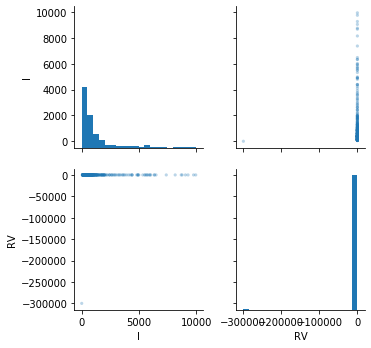

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [7]:
mf=(dt.I<30000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mrv]

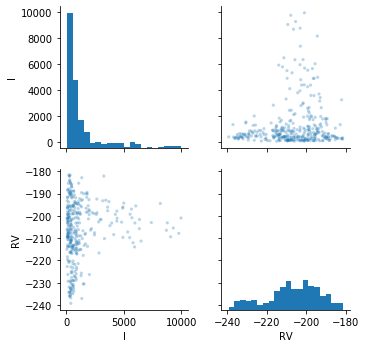

In [8]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBRx.py:702: RuntimeWarning: invalid value encountered in sqrt
  dery[i]=dfs[i]/np.sqrt(dl[i]-1)
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBRx.py:708: RuntimeWarning: invalid value encountered in sqrt
  derx[i]=dls[i]/np.sqrt(dl[i]-1)


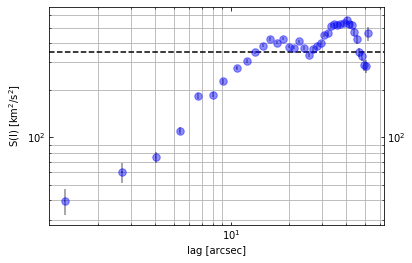

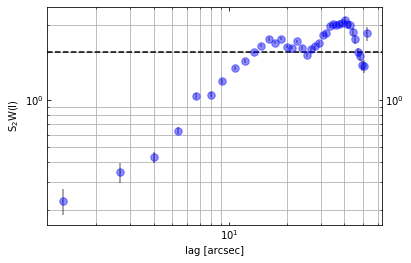

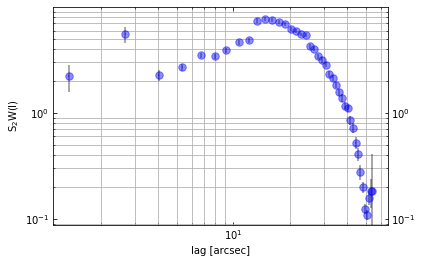

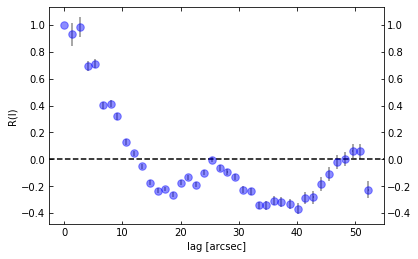

In [9]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfwx(dt)
afH00=acf(dt)
#psH00=ps(dt)

In [10]:
datap='dataII6583.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,-1058.749331,242.345439
std,14.726759,7.004072,16199.653712,415.917431
min,75.096000,0.000000,-299766.779000,0.000000
25%,87.165000,5.000000,-191.115078,46.080000
50%,99.904500,11.000000,-182.462402,95.800000
75%,112.644000,15.000000,-174.697764,244.450000
max,124.713000,22.000000,-90.948967,4581.000000


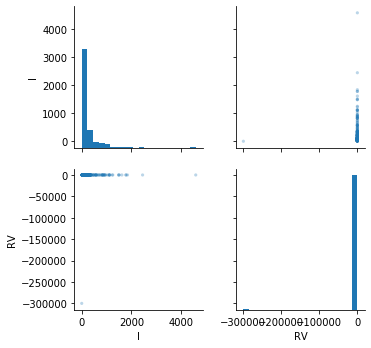

In [11]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [12]:
mf=(dt.I<2500)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

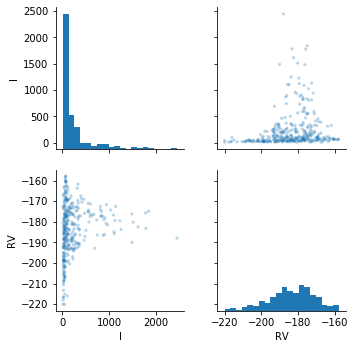

In [13]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


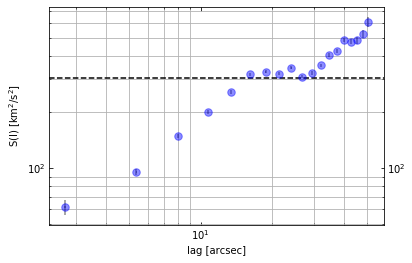

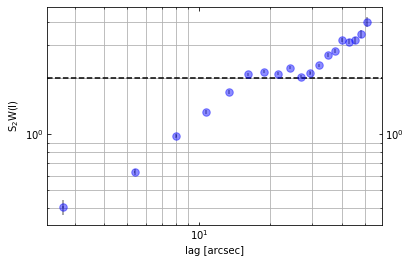

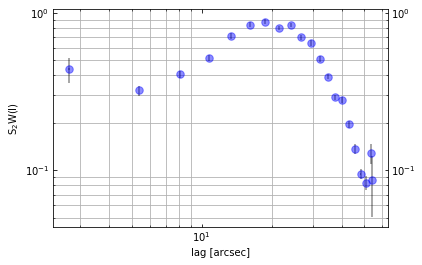

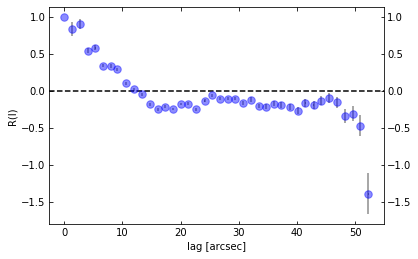

In [14]:
sfN00=sosf(dt)
sfNH00=sosfnorm(dt)
sfwN00=sosfwx(dt)
afN00=acf(dt)
#psN00=ps(dt)

In [15]:
datap='dataII6731.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,342.000000,342.000000,342.000000,342.000000
mean,99.904500,10.555556,-1059.206107,80.316478
std,14.726759,7.004072,16199.636015,145.405560
min,75.096000,0.000000,-299766.779000,-8.589000
25%,87.165000,5.000000,-191.603838,19.355000
50%,99.904500,11.000000,-184.522126,37.635000
75%,112.644000,15.000000,-177.329067,90.387500
max,124.713000,22.000000,9.779553,1937.000000


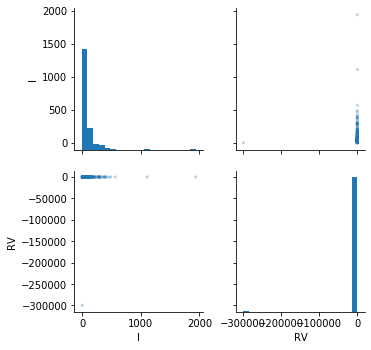

In [16]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [17]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-140)&(dt.RV>-240)
dt=dt[mrv]

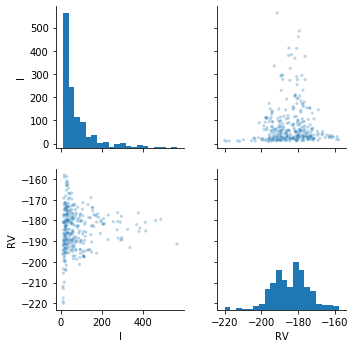

In [18]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

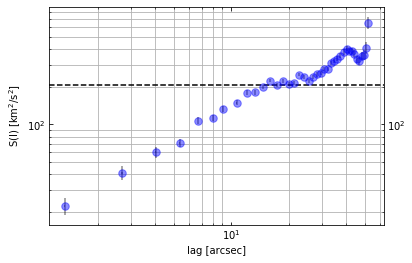

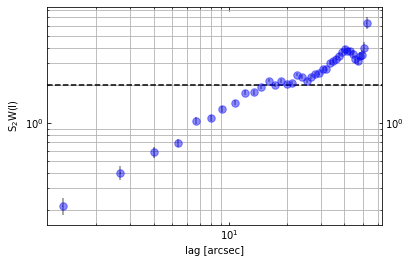

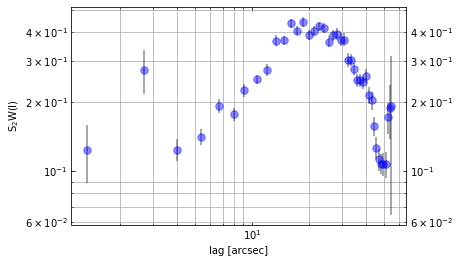

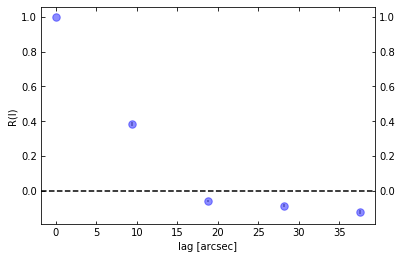

In [19]:
sfS00=sosf(dt)
sfSH00=sosfnorm(dt)
sfwS00=sosfwx(dt)
afS00=acf(dt)
#psS00=ps(dt)

In [20]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
#lr=[6562.8,6548,6583,6717,6731]#AngstromsR
lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=85
max0=115

inputf='595.Isis.WHT.Blue.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [21]:
for i in 0,2:
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lb[Nx])/lb[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lb[Nx]))+'.csv')

In [22]:
datap='dataII5006.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,189.000000,189.000000,189.000000,189.000000
mean,100.128000,10.555556,-2994.878617,2993.576101
std,8.684507,7.012400,30869.416639,35586.070545
min,85.824000,0.000000,-299766.779000,-43.440000
25%,92.976000,5.000000,-210.590156,7.894000
50%,100.128000,11.000000,-198.016225,18.990000
75%,107.280000,15.000000,-183.586142,47.010000
max,114.432000,22.000000,24727.287698,487100.000000


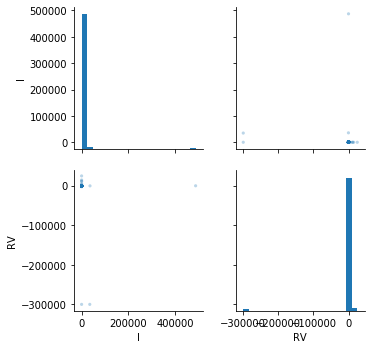

In [23]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [24]:
mf=(dt.I<1000)&(dt.I>10)
dt=dt[mf]
mrv=(dt.RV<-150)&(dt.RV>-250)
dt=dt[mrv]

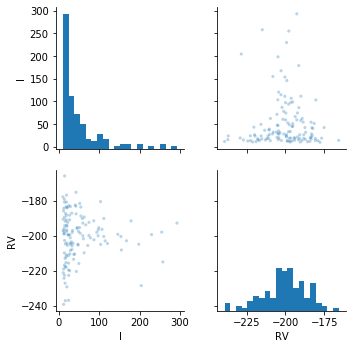

In [25]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

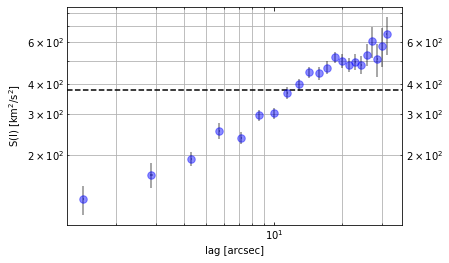

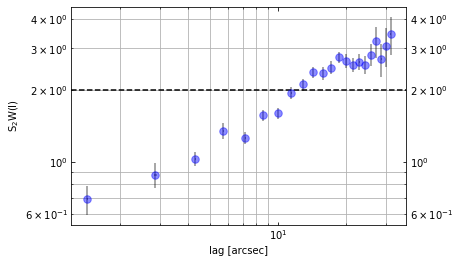

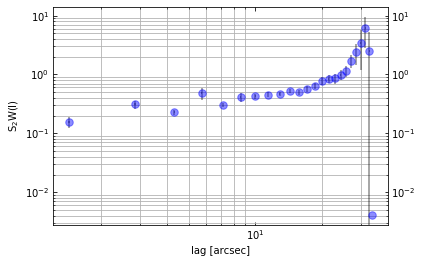

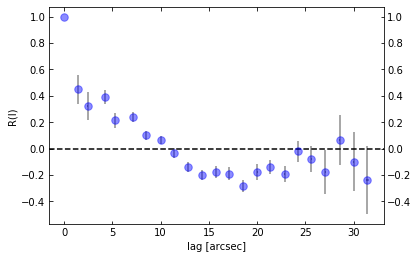

In [26]:
sfO00=sosf(dt)
sfO00=sosfnorm(dt)
sfwO00=sosfwx(dt)
afO00=acf(dt)
#psO00=ps(dt)